# Laplace-Filter

## Implementierung des Laplace-Filters


### Imports:

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cv2

## Laplace Filtermaske

Für den Filter wurde der diskrete Laplace-Operator verwendet.\
Es wurden die beiden gängisten 2-dimensionalen Filtermasken verwendet:\
\begin{align}
Maske1:
\begin{vmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{vmatrix}
\end{align}
\begin{align}
Maske2 (für diagonale Kanten):
\begin{vmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{vmatrix}
\end{align}

In [2]:
laplace_mask1 = np.array([(0,1,0), (1,-4,1), (0,1,0)])
laplace_mask2 = np.array([(1,1,1), (1,-8,1), (1,1,1)])

## Faltung 

Für die Faltung der Filtermaske mit dem Bild wird die Methode convo() aus der Aufgabe Binomial-Filter verwendet.

In [3]:
def convo(grey_img, binom_matrix):
    print("filter matrix Shape : {}".format(binom_matrix.shape))
    
    image_row, image_col = grey_img.shape
    kernel_row, kernel_col = binom_matrix.shape

    output = np.zeros(grey_img.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = grey_img

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(binom_matrix * padded_image[row:row + kernel_row, col:col + kernel_col])

    print("Output Image size : {}".format(output.shape))
    return output
    
    

## Visualisierung

### Anwenden der Methoden
Zuerst wird das Bild "Lenna.png" geladen und in Graustufen formatiert.\
Auf das Graustufenbild kann dann die Faltung mit den beiden Filtermasken angewandt werden.

In [4]:
image = cv2.imread("Ape.jpeg")
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
laplace1 = convo(grey_img, laplace_mask1)
laplace2 = convo(grey_img, laplace_mask2)

filter matrix Shape : (3, 3)
Output Image size : (480, 512)
filter matrix Shape : (3, 3)
Output Image size : (480, 512)


### Bilder zeichnen

(-0.5, 511.5, 479.5, -0.5)

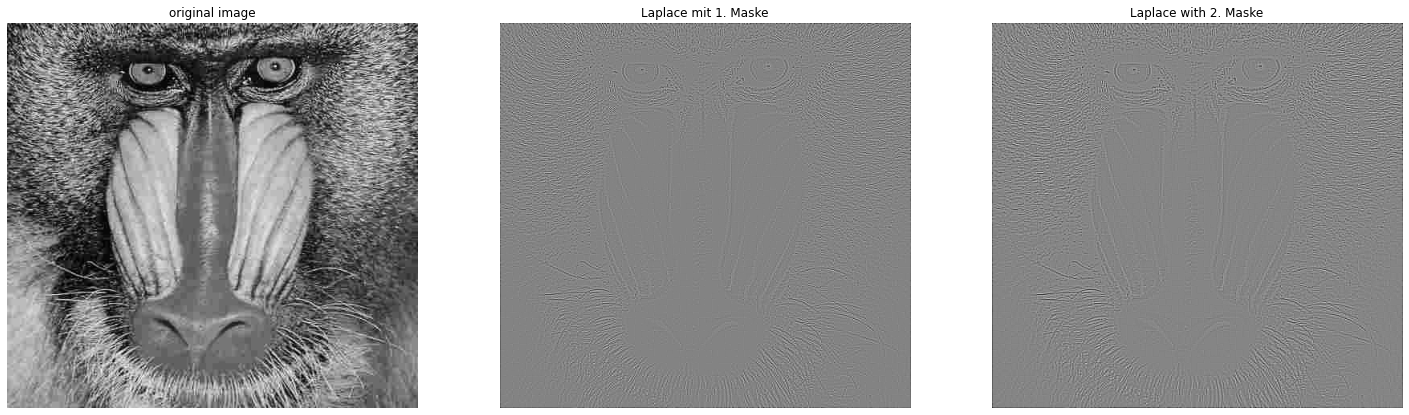

In [5]:
fig = plt.figure(figsize=(25, 25))
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0], title="original image")
ax2 = fig.add_subplot(gs[0, 1], title="Laplace mit 1. Maske")
ax3 = fig.add_subplot(gs[0, 2], title="Laplace with 2. Maske")
ax1.imshow(grey_img, cmap='gray')
ax1.axis('off')
ax2.imshow(laplace1, cmap='gray')
ax2.axis('off')
ax3.imshow(laplace2, cmap='gray')
ax3.axis('off')